# Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. Size of training set: 10683 records

There are  11 features and price is the target feature which we need to predict

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

#  Steps:
1. Load dataset
2. Basic analysis 
3. Checking Missing
4. Checking Duplicate data
5. Checking Oultier
6. EDA
 - Univariant analysis
 - Analysis on Date of Date_of_Journey
7. Feature engineering 
8. Model Building
9. Model hyperparameter tunning and evalution

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load dataset
df_load = pd.read_excel(r"D:\STUDY\Github ML Content\Case_Study_on_dataset\Airfare price prediction\Data_Train.xlsx")
df_load.head(100)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
95,IndiGo,21/06/2019,Chennai,Kolkata,MAA → CCU,05:15,07:40,2h 25m,non-stop,No info,3540
96,SpiceJet,15/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
97,Jet Airways,3/06/2019,Banglore,Delhi,BLR → DEL,19:50,22:50,3h,non-stop,In-flight meal not included,6478
98,Jet Airways,18/06/2019,Mumbai,Hyderabad,BOM → HYD,07:05,08:30,1h 25m,non-stop,No info,8040


### Basic Analysis

In [3]:
df_load.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df_load.shape

(10683, 11)

Note: there is only one numrical feature "Price" All are categoical data in the set

### Checking missing 

In [6]:
df_load.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

NOTE:  There are very few missing values in the dataset so , we can drop them

### Handling Missing

In [7]:
df_load.dropna(inplace=True)

In [8]:
### Checking Duplicates in the dataset
df_load[df_load.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


### handling Duplicates:

In [9]:
df_load.drop_duplicates(keep='first',inplace=True)

### Checking Oultier

In [10]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(df_load.Price)
plt.show() 

<Figure size 1000x700 with 1 Axes>

NOTE : As we can see there are outlier in the dataset But we can say for sure right now lets do some other analysis on this

In [11]:
# Filter dataset on price more then 40,000
print(df_load[df_load['Price'] > 40000] )

                    Airline Date_of_Journey    Source Destination  \
657    Jet Airways Business      01/03/2019  Banglore   New Delhi   
1478            Jet Airways      18/03/2019  Banglore   New Delhi   
2618            Jet Airways      18/03/2019  Banglore   New Delhi   
2924   Jet Airways Business      01/03/2019  Banglore   New Delhi   
5372   Jet Airways Business      01/03/2019  Banglore   New Delhi   
5439            Jet Airways      01/03/2019  Banglore   New Delhi   
7351   Jet Airways Business       3/03/2019     Delhi      Cochin   
9715   Jet Airways Business       6/03/2019     Delhi      Cochin   
10364  Jet Airways Business      01/03/2019  Banglore   New Delhi   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
657          BLR → BOM → DEL    05:45         10:45       5h      1 stop   
1478         BLR → BOM → DEL    18:40  00:45 16 Mar    6h 5m      1 stop   
2618         BLR → BOM → DEL    22:50  05:05 16 Mar   6h 15m      1 stop   
2924 

NOTE: We can consider Price[79512,62427] as they are of same plane company but prices are so high 

### Handling Outlier By removing them

In [12]:
df_load = df_load[df_load['Price'] <= 62427]
df_load.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


###  Exploratory Data Analysis

In [13]:
#Univariant - Airline Analysis
df_load['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    5
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [14]:
#Univariant - Source Analysis
df_load['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2178
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [15]:
#Univariant - Source Analysis
df_load['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     913
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

NOTE: As we can see our data is biased on Jet Airways ,IndiGo airline and Source Delhi Destination Cohin

### Analysis on Date of Date_of_Journey

In [16]:
## Lets seperate Date_of_Journey into month,date
df_load['Date'] = df_load["Date_of_Journey"].str.split("/").str[0].astype(int)
df_load['Month'] = df_load["Date_of_Journey"].str.split("/").str[1].astype(int)
df_load.drop(["Date_of_Journey"], axis = 1, inplace = True)
df_load.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


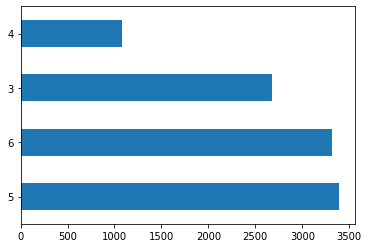

In [17]:
# Count the flight month wise
df_load['Month'].value_counts().plot(kind='barh')

NOTE : May and June Are  the time where flight count is more

### Feature Engineering

In [18]:
df_load['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     913
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [19]:
df_load['Destination'].replace('Delhi', 'New Delhi', inplace=True)

NOTE: Delhi is changed to New Delhi

In [20]:
df_load["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     3
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [21]:
df_load["Additional_Info"] = df_load["Additional_Info"].replace({'No Info':'No info'})

In [22]:
df_load["Additional_Info"] = df_load["Additional_Info"].replace({'Change airports':'Other','Business class':'Other','2 Long layover':'Other','1 Short layover':'Other','Red-eye flight':'Other'})

NOTE: No Info is changed to No info

In [23]:
#Convert Duration from Hours to min.
df_load['Duration'] = df_load['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [24]:
df_load['Dep_hour'] = pd.to_datetime(df_load['Dep_Time']).dt.hour
df_load['Dep_min'] = pd.to_datetime(df_load['Dep_Time']).dt.minute
df_load.drop(['Dep_Time'],axis=1 , inplace= True)

In [25]:
df_load['Arrival_hour'] = pd.to_datetime(df_load['Arrival_Time']).dt.hour
df_load['Arrival_min'] = pd.to_datetime(df_load['Arrival_Time']).dt.minute
df_load.drop(['Arrival_Time'],axis=1 , inplace= True)

In [26]:
df_load["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Other                             13
Name: Additional_Info, dtype: int64

In [27]:
df_load["Total_Stops"].value_counts()

1 stop      5624
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [28]:
df_categorical = df_load.select_dtypes(exclude=['int64','int32','float'])
df_numerical = df_load.select_dtypes(include=['int64','int32','float'])

In [29]:
# Converting Categorical Data to numerical
# Using Label Encoding on categorical columns
from sklearn.preprocessing import LabelEncoder
lE = LabelEncoder()
df_categorical= df_categorical.apply(lE.fit_transform)

### Concate both categorical and numerical data

In [30]:
df_FE = pd.concat([df_categorical, df_numerical], axis=1)
df_FE.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Price,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,4,18,4,3,170,3897,24,3,22,20,1,10
1,1,3,0,84,1,3,445,7662,1,5,5,50,13,15
2,4,2,1,118,1,3,1140,13882,9,6,9,25,4,25
3,3,3,0,91,0,3,325,6218,12,5,18,5,23,30
4,3,0,4,29,0,3,285,13302,1,3,16,50,21,35
5,8,3,0,64,4,3,145,3873,24,6,9,0,11,25
6,4,0,4,5,0,1,930,11087,12,3,18,55,10,25
7,4,0,4,5,0,3,1265,22270,1,3,8,0,5,5
8,4,0,4,5,0,1,1530,11087,12,3,8,55,10,25
9,6,2,1,104,0,3,470,8625,27,5,11,25,19,15


In [31]:
# Saving
df_final = df_FE
df_final = df_final.drop(['Route'],axis=1)
df_final.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration,Price,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,4,4,3,170,3897,24,3,22,20,1,10
1,1,3,0,1,3,445,7662,1,5,5,50,13,15
2,4,2,1,1,3,1140,13882,9,6,9,25,4,25
3,3,3,0,0,3,325,6218,12,5,18,5,23,30
4,3,0,4,0,3,285,13302,1,3,16,50,21,35


In [32]:
y = df_final.pop('Price')
X = df_final

In [33]:
X.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,4,4,3,170,24,3,22,20,1,10
1,1,3,0,1,3,445,1,5,5,50,13,15
2,4,2,1,1,3,1140,9,6,9,25,4,25
3,3,3,0,0,3,325,12,5,18,5,23,30
4,3,0,4,0,3,285,1,3,16,50,21,35


### Spliting data Into Train and test

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3, random_state=42)

### Model Building

In [35]:
# Libray:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [36]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### Ridge

In [37]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)
y_predict_r = ridge_regressor.predict(X_test)

In [38]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print('Root mean Squared error: ',sqrt(mse(y_test,y_predict_r)))
print('Mean Absolute % error: ',round(mean_absolute_percentage_error(y_test,y_predict_r)))
print('R-Squared: ',r2_score(y_test,y_predict_r))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean Squared error:  3399.9614092790457
Mean Absolute % error:  33.0
R-Squared:  0.4315469136979172


#### Lasso

In [39]:
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)
y_predict_lasso = lasso_regressor.predict(X_test)

In [40]:
print("Test Results for Lasso Regressor Model:")
print(50 * '-')
print('Root mean Squared error: ',sqrt(mse(y_test,y_predict_lasso)))
print('Mean Absolute % error: ',round(mean_absolute_percentage_error(y_test,y_predict_lasso)))
print('R-Squared: ',r2_score(y_test,y_predict_lasso))

Test Results for Lasso Regressor Model:
--------------------------------------------------
Root mean Squared error:  3401.589305056557
Mean Absolute % error:  32.0
R-Squared:  0.4310024346269855


#### K Neighbors Regressor

In [41]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)
y_predict_knn = knn_regressor.predict(X_test)

In [42]:
print("Test Results for K Neighbors Regressor Model:")
print(50 * '-')
print('Root mean Squared error: ',sqrt(mse(y_test,y_predict_knn)))
print('Mean Absolute % error: ',round(mean_absolute_percentage_error(y_test,y_predict_knn)))
print('R-Squared: ',r2_score(y_test,y_predict_knn))

Test Results for K Neighbors Regressor Model:
--------------------------------------------------
Root mean Squared error:  2998.7925140609314
Mean Absolute % error:  20.0
R-Squared:  0.5577788705429005


#### Decision Tree Regressor

In [43]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
dt_tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
dt_tree.fit(X_train,y_train)
y_predict_dt = dt_tree.predict(X_test)

In [44]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_predict_dt)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_predict_dt)))
print("R-squared: ", r2_score(y_test, y_predict_dt))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  1911.2190892882795
Mean absolute % error:  9.0
R-squared:  0.8203746603304047


#### Random Forest Regressor

In [45]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)
y_predict_rf=random_regressor.predict(X_test)

In [46]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_predict_rf)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_predict_rf)))
print("R-squared: ", r2_score(y_test, y_predict_rf))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  1582.462645935251
Mean absolute % error:  8.0
R-squared:  0.8768559059823611


#### XGB Regressor

In [ ]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
y_predict_XGB= model.predict(X_test)

In [ ]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_predict_XGB)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_predict_XGB)))
print("R-squared: ", r2_score(y_test, y_predict_XGB))

NOTE: Random Forest Regressor & XGB Regressor are giving Maximum Accuracy as compare to other Regressor algorithm.

Conclusion: 
 - Selecting Random forest because MAE of Random Forest is less than DecisionTree and XGBoost    - 